In [1]:
import sys
sys.version

'3.8.8 (default, Feb 24 2021, 15:54:32) [MSC v.1928 64 bit (AMD64)]'

In [3]:
import pandas as pd
import numpy as np

print(pd.__version__)
print(np.__version__)

1.2.2
1.20.0


## pd.merge()

In [7]:
dict1 = {'name':['홍길동', '홍길동', '김철수', '박영희', '김철수','김철수','홍길동'],
        'korean':range(7)}
dict2 = {'name':['김철수', '홍길동', '심수봉'],
        'english':range(3)}
df1 = pd.DataFrame(dict1)
df2 = pd.DataFrame(dict2)

In [8]:
df1

,name,korean
0,홍길동,0
1,홍길동,1
2,김철수,2
3,박영희,3
4,김철수,4
5,김철수,5
6,홍길동,6


In [9]:
df2

,name,english
0,김철수,0
1,홍길동,1
2,심수봉,2


In [11]:
df3 = pd.merge(df1, df2, on='name', how='inner')  #겹치는 데이터만 가져옴 두 데이터 프레임에서 겹치는 데이터만
df3

,name,korean,english
0,홍길동,0,1
1,홍길동,1,1
2,홍길동,6,1
3,김철수,2,0
4,김철수,4,0
5,김철수,5,0


In [12]:
df4 = pd.merge(df1, df2, on='name', how='outer')  #겹치는 데이터만 가져옴 두 데이터 프레임에서 겹치는 데이터만
df4

,name,korean,english
0,홍길동,0.0,1.0
1,홍길동,1.0,1.0
2,홍길동,6.0,1.0
3,김철수,2.0,0.0
4,김철수,4.0,0.0
5,김철수,5.0,0.0
6,박영희,3.0,NaN
7,심수봉,NaN,2.0


In [14]:
pd.merge(df1, df2, on='name', how='right')

,name,korean,english
0,김철수,2.0,0
1,김철수,4.0,0
2,김철수,5.0,0
3,홍길동,0.0,1
4,홍길동,1.0,1
5,홍길동,6.0,1
6,심수봉,NaN,2


In [19]:
s1 = pd.Series([0,1], index=list('ab'))
s2 = pd.Series([2,3,4], index=list('cde'))
s3 = pd.Series([5,6], index=list('fg'))

In [20]:
s1

a    0
b    1
dtype: int64

In [21]:
s2

c    2
d    3
e    4
dtype: int64

In [22]:
s3

f    5
g    6
dtype: int64

In [24]:
pd.concat([s1,s2,s3], axis=1)

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [25]:
df5 = pd.DataFrame(np.arange(6).reshape(3,2),
                  index=list('abc'),
                  columns=['one','two'])
df6 = pd.DataFrame(np.arange(4).reshape(2,2),
                  index=list('ac'),
                  columns=['three','four'])

In [26]:
df5

,one,two
a,0,1
b,2,3
c,4,5


In [27]:
df6

,three,four
a,0,1
c,2,3


In [31]:
pd.concat([df5, df6], axis=1, keys=['d5', 'd6'])

d5        d6     
  one two three four
a   0   1   0.0  1.0
b   2   3   NaN  NaN
c   4   5   2.0  3.0

In [35]:
ex1 = pd.read_csv('ex1.csv', header=0)
ex1

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [40]:
ex2 = pd.read_csv('ex2.csv', names=['one','two','three','four','info'])
ex2

,one,two,three,four,info
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [41]:
ex2 = pd.read_csv('ex2.csv', names=['one','two','three','four','info'], index_col='info')
ex2

,one,two,three,four
info,,,,
hello,1,2,3,4
world,5,6,7,8
foo,9,10,11,12


In [43]:
df10 = pd.read_csv('welfare.csv')
df10

,gender,birth,marriage,religion,code_job,income,code_religion
0,2,1936,2,2,NaN,NaN,1
1,2,1945,2,2,NaN,NaN,1
2,1,1948,2,2,942.0,120.0,1
3,1,1942,3,1,762.0,200.0,1
4,2,1923,2,1,NaN,NaN,1
...,...,...,...,...,...,...,...
16659,2,1967,1,1,NaN,NaN,5
16660,2,1992,5,1,314.0,302.5,5
16661,1,1995,5,1,NaN,NaN,5
16662,2,1998,0,1,NaN,NaN,5


In [44]:
df10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16664 entries, 0 to 16663
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         16664 non-null  int64  
 1   birth          16664 non-null  int64  
 2   marriage       16664 non-null  int64  
 3   religion       16664 non-null  int64  
 4   code_job       7529 non-null   float64
 5   income         4634 non-null   float64
 6   code_religion  16664 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 911.4 KB


In [45]:
df10.head(15)

,gender,birth,marriage,religion,code_job,income,code_religion
0,2,1936,2,2,NaN,NaN,1
1,2,1945,2,2,NaN,NaN,1
2,1,1948,2,2,942.0,120.0,1
3,1,1942,3,1,762.0,200.0,1
4,2,1923,2,1,NaN,NaN,1
5,1,1962,1,1,530.0,NaN,1
6,2,1963,1,1,NaN,NaN,1
7,2,2003,0,1,NaN,NaN,1
8,1,1927,1,1,NaN,NaN,1
9,2,1934,1,1,NaN,NaN,1


In [46]:
df10.tail(10)

,gender,birth,marriage,religion,code_job,income,code_religion
16654,1,1956,1,2,743.0,187.66,6
16655,2,1958,1,1,611.0,NaN,6
16656,1,1932,1,2,NaN,NaN,6
16657,2,1933,1,2,NaN,NaN,6
16658,1,1967,1,1,874.0,NaN,5
16659,2,1967,1,1,NaN,NaN,5
16660,2,1992,5,1,314.0,302.50,5
16661,1,1995,5,1,NaN,NaN,5
16662,2,1998,0,1,NaN,NaN,5
16663,1,2001,0,1,NaN,NaN,5


In [47]:
df10.describe()

,gender,birth,marriage,religion,code_job,income,code_religion
count,16664.000000,16664.000000,16664.000000,16664.000000,7529.000000,4634.000000,16664.000000
mean,1.545247,1967.568711,1.647744,1.517103,591.243724,241.619016,3.704873
std,0.497963,24.179743,1.571827,0.499722,255.793317,184.423869,2.069207
min,1.000000,1907.000000,0.000000,1.000000,111.000000,0.000000,1.000000
25%,1.000000,1946.000000,1.000000,1.000000,314.000000,122.000000,2.000000
50%,2.000000,1966.000000,1.000000,2.000000,611.000000,192.500000,3.000000
75%,2.000000,1988.000000,2.000000,2.000000,863.000000,316.600000,6.000000
max,2.000000,2014.000000,6.000000,2.000000,1012.000000,2400.000000,7.000000


In [48]:
df12 = pd.DataFrame(np.arange(6).reshape(2,3),
                   index=pd.Index(['ohio','colorado'], name='state'),
                   columns=pd.Index(['one','two','three'], name='number'))
df12

number,one,two,three
state,,,
ohio,0,1,2
colorado,3,4,5


In [49]:
result = df12.stack()
result

state     number
ohio      one       0
          two       1
          three     2
colorado  one       3
          two       4
          three     5
dtype: int32

In [51]:
result.unstack(level=0)

state,ohio,colorado
number,,
one,0,3
two,1,4
three,2,5


In [52]:
result.unstack('state')

state,ohio,colorado
number,,
one,0,3
two,1,4
three,2,5


In [53]:
df1 = pd.DataFrame({'key1':['a','a','b','b','a'],
                   'key2':['one','two','one','two','one'],
                   'data1':np.random.randn(5),
                   'data2':np.random.randn(5)})
df1

,key1,key2,data1,data2
0,a,one,1.343247,-0.517969
1,a,two,-0.096262,0.327059
2,b,one,0.434898,-0.399534
3,b,two,0.236721,0.293796
4,a,one,-2.452320,0.378858


In [54]:
grouped = df1['data1'].groupby(df1['key1'])
grouped.mean()

key1
a   -0.401778
b    0.335809
Name: data1, dtype: float64

In [58]:
grouped2 = df1['data1'].groupby([df1['key1'], df1['key2']])
grouped2.sum()

key1  key2
a     one    -1.109073
      two    -0.096262
b     one     0.434898
      two     0.236721
Name: data1, dtype: float64

In [59]:
grouped3 = df1.groupby('key1')
grouped3.mean()

,data1,data2
key1,,
a,-0.401778,0.062649
b,0.335809,-0.052869


In [ ]:
for (n1, n2), group in g

In [60]:
for d in grouped3:
    print(d)

('a',   key1 key2     data1     data2
0    a  one  1.343247 -0.517969
1    a  two -0.096262  0.327059
4    a  one -2.452320  0.378858)
('b',   key1 key2     data1     data2
2    b  one  0.434898 -0.399534
3    b  two  0.236721  0.293796)


In [62]:
gdata = dict(list(grouped3))

In [63]:
gdata['b']

,key1,key2,data1,data2
2,b,one,0.434898,-0.399534
3,b,two,0.236721,0.293796


In [64]:
gdata['a']

,key1,key2,data1,data2
0,a,one,1.343247,-0.517969
1,a,two,-0.096262,0.327059
4,a,one,-2.452320,0.378858


In [65]:
df2 = pd.DataFrame(np.random.randn(5,5), index=['bob','steve','jim','joe','travis'],
                  columns=list('abcde'))
df2

,a,b,c,d,e
bob,0.937386,0.130815,0.439355,0.304148,-0.980178
steve,0.462112,0.637739,-0.004190,0.218878,0.835102
jim,-0.531224,-1.314359,0.531768,-1.392408,-0.278958
joe,1.327737,0.629826,0.995301,-0.445217,1.236768
travis,0.103494,0.151417,-0.610856,0.714272,-0.201789


In [66]:
mapping = {'a':'red', 'b':'red', 'c':'blue', 'd':'blue', 'e':'red'}

d6 = df2.groupby(mapping, axis=1)
d6.mean()

,blue,red
bob,0.371751,0.029341
steve,0.107344,0.644984
jim,-0.430320,-0.708181
joe,0.275042,1.064777
travis,0.051708,0.017707


In [68]:
mlist = ['red','red', 'blue', 'blue', 'red'] #marking 가독성이 살짝 떨어짐

d6 = df2.groupby(mlist, axis=1)
d6.mean()

,blue,red
bob,0.371751,0.029341
steve,0.107344,0.644984
jim,-0.430320,-0.708181
joe,0.275042,1.064777
travis,0.051708,0.017707


In [73]:
tips = pd.read_csv('tips.csv')
tips

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...,...
239,239,29.03,5.92,Male,No,Sat,Dinner,3
240,240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,242,17.82,1.75,Male,No,Sat,Dinner,2


In [74]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  244 non-null    int64  
 1   total_bill  244 non-null    float64
 2   tip         244 non-null    float64
 3   sex         244 non-null    object 
 4   smoker      244 non-null    object 
 5   day         244 non-null    object 
 6   time        244 non-null    object 
 7   size        244 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 15.4+ KB


In [75]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips.head()

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


In [76]:
grouped = tips.groupby(['sex', 'smoker'])
grouped_pct = grouped['tip_pct']
grouped_pct.mean()

sex     smoker
Female  No        0.156921
        Yes       0.182150
Male    No        0.160669
        Yes       0.152771
Name: tip_pct, dtype: float64

In [77]:
grouped_pct.agg('mean') #함수를 여러개 쓸수 있다


sex     smoker
Female  No        0.156921
        Yes       0.182150
Male    No        0.160669
        Yes       0.152771
Name: tip_pct, dtype: float64

In [78]:
grouped_pct.agg(['mean', 'std']) #함수를 여러개 쓸수 있다

mean       std
sex    smoker                    
Female No      0.156921  0.036421
       Yes     0.182150  0.071595
Male   No      0.160669  0.041849
       Yes     0.152771  0.090588

In [79]:
grouped.agg({'tip':'max', 'size':'sum'}) # 열별로 다른함수를 적용하고자 할때

tip  size
sex    smoker            
Female No       5.2   140
       Yes      6.5    74
Male   No       9.0   263
       Yes     10.0   150

In [80]:
grouped.agg({'tip':['max', 'std', 'mean'], 'size':['min', 'sum']})

tip                     size     
                max       std      mean  min  sum
sex    smoker                                    
Female No       5.2  1.128425  2.773519    1  140
       Yes      6.5  1.219916  2.931515    1   74
Male   No       9.0  1.489559  3.113402    2  263
       Yes     10.0  1.500120  3.051167    1  150

In [81]:
tips.pivot_table(index=['sex','smoker'],
                aggfunc='mean')

Unnamed: 0      size       tip   tip_pct  total_bill
sex    smoker                                                      
Female No      103.148148  2.592593  2.773519  0.156921   18.105185
       Yes     168.878788  2.242424  2.931515  0.182150   17.977879
Male   No       89.835052  2.711340  3.113402  0.160669   19.791237
       Yes     163.150000  2.500000  3.051167  0.152771   22.284500

In [82]:
tips.pivot_table(index=['sex','day'],
                 columns = 'smoker',
                 aggfunc='mean')

Unnamed: 0                  size                 tip            \
smoker               No         Yes        No       Yes        No       Yes   
sex    day                                                                    
Female Fri   158.500000  151.142857  2.500000  2.000000  3.125000  2.682857   
       Sat    68.846154  160.133333  2.307692  2.200000  2.724615  2.868667   
       Sun    73.357143  179.000000  3.071429  2.500000  3.329286  3.500000   
       Thur  133.240000  199.571429  2.480000  2.428571  2.459600  2.990000   
Male   Fri    95.000000  142.750000  2.000000  2.125000  2.500000  2.741250   
       Sat    91.937500  158.000000  2.656250  2.629630  3.256563  2.879259   
       Sun    76.930233  180.133333  2.883721  2.600000  3.115349  3.521333   
       Thur  113.700000  167.900000  2.500000  2.300000  2.941500  3.058000   

              tip_pct           total_bill             
smoker             No       Yes         No        Yes  
sex    day                                             
Female Fri   0.165296  0.209129  19.365000  12.654286  
       Sat   0.147993  0.163817  19.003846  20.266667  
       Sun   0.165710  0.237075  20.824286  16.540000  
       Thur  0.155971  0.163073  16.014400  19.218571  
Male   Fri   0.138005  0.144730  17.475000  20.452500  
       Sat   0.162132  0.139067  19.929063  21.837778  
       Sun   0.158291  0.173964  20.403256  26.141333  
       Thur  0.165706  0.164417  18.486500  19.171000

In [83]:
tips.pivot_table('tip_pct',
                 index=['sex','day'],
                 columns = 'smoker',
                 aggfunc='mean')

smoker             No       Yes
sex    day                     
Female Fri   0.165296  0.209129
       Sat   0.147993  0.163817
       Sun   0.165710  0.237075
       Thur  0.155971  0.163073
Male   Fri   0.138005  0.144730
       Sat   0.162132  0.139067
       Sun   0.158291  0.173964
       Thur  0.165706  0.164417

In [84]:
# 인덱스 소팅 : sort_index, 밸류 소팅: sort_value

In [85]:
df3 = pd.DataFrame(np.arange(8).reshape(2,4),
                  index=['three', 'one'],
                  columns=list('dabc'))
df3

,d,a,b,c
three,0,1,2,3
one,4,5,6,7


In [86]:
df3.sort_index(axis=0)

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [87]:
df3.sort_index(axis=1, ascending=False)

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


In [88]:
df4 = pd.DataFrame({'b':[5,7,-4,3], 'a':[0,1,0,1]})
df4

,b,a
0,5,0
1,7,1
2,-4,0
3,3,1


In [89]:
df4.sort_values(by='b')

,b,a
2,-4,0
3,3,1
0,5,0
1,7,1


In [91]:
df4.sort_values(by=['a', 'b'])

,b,a
2,-4,0
0,5,0
3,3,1
1,7,1


In [92]:
import matplotlib.pyplot as plt

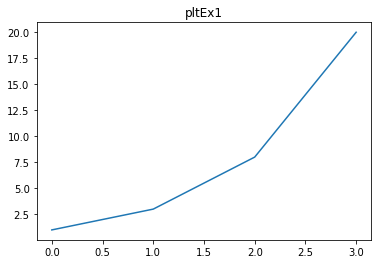

In [94]:
plt.title('pltEx1')
plt.plot([1, 3, 8, 20])
plt.show()

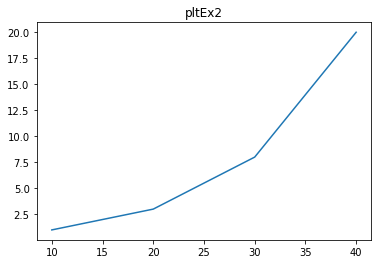

In [95]:
plt.title('pltEx2')
plt.plot([10,20,30,40], [1, 3, 8, 20])
plt.show()

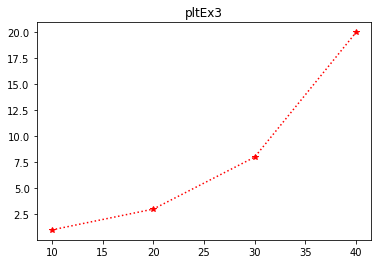

In [112]:
plt.title('pltEx3')
plt.plot([10,20,30,40], [1, 3, 8, 20], 'r*:')
plt.show()

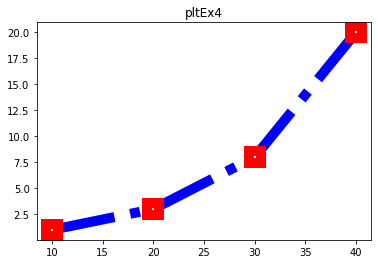

In [113]:
plt.title('pltEx4')
plt.plot([10,20,30,40], [1, 3, 8, 20], c='b', lw=10, ls='-.', marker='s', ms=12, mec='r', mew=10, mfc='w')
plt.show()

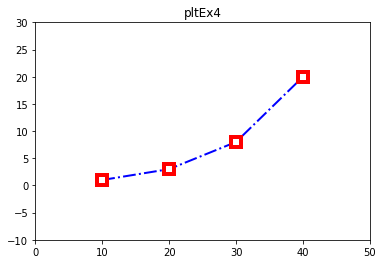

In [116]:
plt.title('pltEx4')
plt.plot([10,20,30,40], [1, 3, 8, 20], c='b', lw=2, ls='-.', marker='s', ms=10, mec='r', mew=4, mfc='w')
plt.xlim(0,50)
plt.ylim(-10, 30)
plt.show()

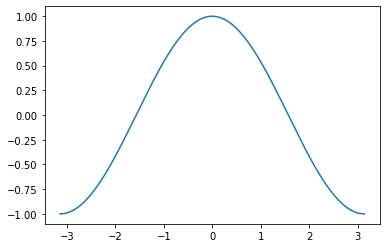

In [118]:
xdata = np.linspace(-np.pi, np.pi, 256)
ydata = np.cos(xdata)
plt.plot(xdata, ydata)
plt.show()

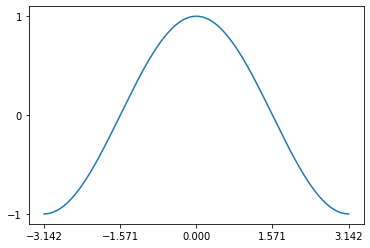

In [120]:
xdata = np.linspace(-np.pi, np.pi, 256)
ydata = np.cos(xdata)
plt.plot(xdata, ydata)
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
plt.yticks([-1, 0, 1 ])
plt.show()

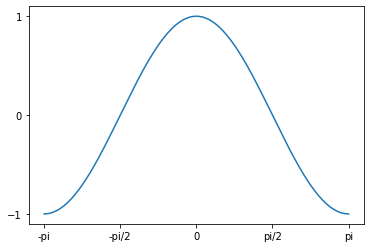

In [121]:
xdata = np.linspace(-np.pi, np.pi, 256)
ydata = np.cos(xdata)
plt.plot(xdata, ydata)
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], ['-pi', '-pi/2', '0', 'pi/2', 'pi'])
plt.yticks([-1, 0, 1 ])
plt.show()